In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

# Data Description

In [6]:
diabetes=pd.read_csv('diabetes.csv')
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Exploration

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

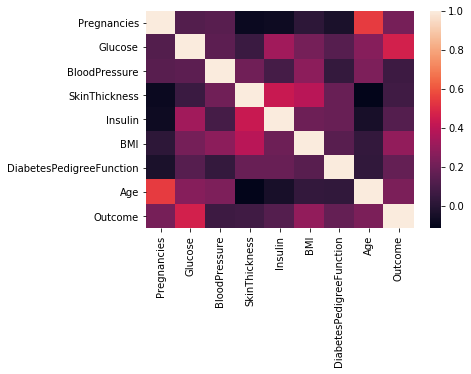

In [8]:
corr= diabetes.corr()
print (corr)

sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)

# Dataset Preparation

In [9]:
dftrain=diabetes[:650]
dftest=diabetes[650:750]
dfcheck=diabetes[750:]

In [10]:
trainLabel= np.asarray(dftrain['Outcome'])
trainData= np.asarray(dftrain.drop('Outcome',1))
testLabel= np.asarray(dftest['Outcome'])
testData= np.asarray(dftest.drop('Outcome',1))

In [11]:
#normalizing
means=np.mean(trainData,axis=0)
stds=np.std(trainData,axis=0)
trainData=(trainData-means)/stds
testData=(testData-means)/stds

#np.mean(trainData,axis=0)=> checks that new mean=0
#np.std(trainData,axis=0)=> checks that new std=1

# Training and Evaluating Machine Learning Models

In [12]:
diabetescheck=LogisticRegression()
diabetescheck.fit(trainData, trainLabel)

C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
accuracy=diabetescheck.score(testData, testLabel)
print("accuracy = ", accuracy*100, "%")

accuracy =  78.0 %


# Interpreting the model using Machine learning algorithms

Text(0.5,0,'importance')

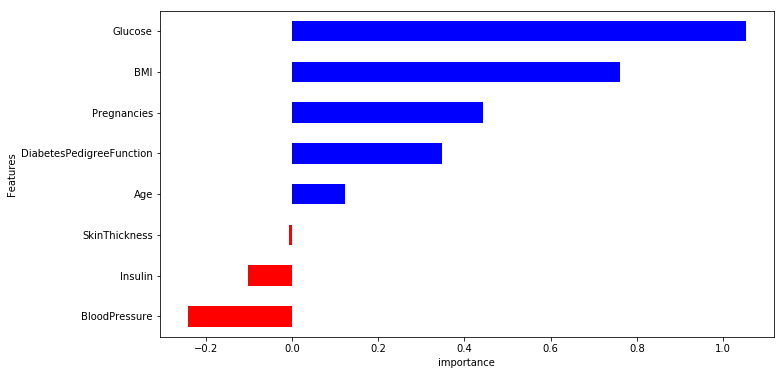

In [19]:
coeff=list(diabetescheck.coef_[0])
labels=list(dftrain.drop('Outcome',1).columns)

features=pd.DataFrame()
features['Features']=labels
features['importance']=coeff
features.sort_values(by=['importance'],ascending=True,inplace=True)
features['positive']=features['importance']>0
features.set_index('Features',inplace=True)
features.importance.plot(kind='barh',figsize=(11,6),color=features.positive.map({True:'blue',False:'red'}))
plt.xlabel('importance')

# making the predictions

In [30]:
sampleData=dfcheck[:1]

#prepare sample
sampleDataFeatures=np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures=(sampleDataFeatures-means)/stds

#predict
predictionProbability=diabetescheck.predict_proba(sampleDataFeatures)
prediction=diabetescheck.predict(sampleDataFeatures)
print('Probablity:',predictionProbability)
print('Prediction:',prediction)

probablity: [[0.4385153 0.5614847]]
prediction: [1]


# This model shows that 56.14% chance that the person is Diabetic